# Chapter 18: (Optional) Further Explorations

**Welcome to the final chapter!** This chapter provides a brief glimpse into several fascinating areas that build upon the foundations of probability we've established. These topics often form the basis for more advanced courses in statistics, machine learning, information theory, and quantitative finance. 

We won't delve into rigorous proofs or exhaustive detail, but rather aim to provide an intuitive understanding and demonstrate simple applications using Python. Consider this a launching point for your further learning.

We will touch upon:
* **Information Theory:** Quantifying information and comparing distributions (Entropy, KL Divergence).
* **Stochastic Processes:** Modeling systems that evolve randomly over time (Poisson Process, Brownian Motion).
* **Generating Functions:** Powerful mathematical tools for analyzing distributions (MGFs, PGFs).

## Introduction to Information Theory

Information theory, pioneered by Claude Shannon, deals with quantifying information, data compression, and communication limits. Two fundamental concepts are entropy and Kullback-Leibler (KL) divergence.

### Entropy

Entropy measures the average level of "information", "surprise", or "uncertainty" inherent in a random variable's possible outcomes. For a discrete random variable $X$ with PMF $p(x)$, the entropy $H(X)$ is defined as:

$$ H(X) = - \sum_{x} p(x) \log_b p(x) $$

The base $b$ of the logarithm determines the units (usually base 2 for bits, base $e$ for nats).

* **High Entropy:** The outcomes are roughly equally likely (high uncertainty). A fair coin flip has higher entropy than a heavily biased coin.
* **Low Entropy:** One outcome is much more likely than others (low uncertainty).

**Example:** Consider a fair six-sided die vs. a heavily weighted die where P(roll=1)=0.9 and P(roll=i)=0.02 for i=2..6. The fair die has higher entropy because the outcome is less predictable.

Let's compare the entropy of English text (where 'e' is common, 'z' is rare) to random characters (where all letters are equally likely). English text will have lower entropy because the letter frequencies are uneven, making it more predictable than random characters.

In [1]:
import numpy as np
from scipy.stats import entropy

# Example: Entropy of a fair die vs. a biased die

# Fair die probabilities
p_fair = np.array([1/6] * 6)

# Biased die probabilities (P(1)=0.5, others equal)
p_biased = np.array([0.5, 0.1, 0.1, 0.1, 0.1, 0.1]) 
# Ensure it sums to 1
assert np.isclose(p_biased.sum(), 1.0)

# Calculate entropy (using base 2 for bits)
entropy_fair = entropy(p_fair, base=2)
entropy_biased = entropy(p_biased, base=2)

print(f"Entropy of fair die: {entropy_fair:.4f} bits")
print(f"Entropy of biased die: {entropy_biased:.4f} bits")

# Higher entropy means more uncertainty/unpredictability

Entropy of fair die: 2.5850 bits
Entropy of biased die: 2.1610 bits


### Kullback-Leibler (KL) Divergence

KL divergence measures how one probability distribution $P$ diverges from a second, expected probability distribution $Q$. It's often interpreted as the information gain achieved when switching from a prior distribution $Q$ to a posterior distribution $P$.

For discrete distributions $P$ and $Q$ defined on the same sample space, the KL divergence from $Q$ to $P$ is:

$$ D_{KL}(P || Q) = \sum_{x} P(x) \log_b \frac{P(x)}{Q(x)} $$

Key properties:
* $D_{KL}(P || Q) \ge 0$
* $D_{KL}(P || Q) = 0$ if and only if $P = Q$
* It is **not** symmetric: $D_{KL}(P || Q) \neq D_{KL}(Q || P)$ in general.

**Example:** How much information is lost if we model the biased die using the distribution of a fair die?

In [2]:
# Example: KL Divergence between biased and fair die

# Note: scipy.stats.entropy(P, Q) calculates KL divergence D_KL(P || Q)

# How different is the biased distribution (P) from the fair one (Q)?
kl_pq = entropy(pk=p_biased, qk=p_fair, base=2) 

# How different is the fair distribution (P) from the biased one (Q)?
kl_qp = entropy(pk=p_fair, qk=p_biased, base=2)

print(f"KL Divergence D_KL(Biased || Fair): {kl_pq:.4f} bits")
print(f"KL Divergence D_KL(Fair || Biased): {kl_qp:.4f} bits")

# The non-zero values indicate the distributions are different.
# The asymmetry shows the 'direction' matters.

KL Divergence D_KL(Biased || Fair): 0.4240 bits
KL Divergence D_KL(Fair || Biased): 0.3500 bits


## Introduction to Stochastic Processes

A stochastic process is a collection of random variables, typically indexed by time, $\{X(t) | t \in T\}$. It describes systems that evolve randomly.

* **Markov Chains (Chapter 16):** Discrete time, discrete state space, memoryless property.
* **Poisson Process:** Continuous time, discrete events occurring randomly.
* **Brownian Motion:** Continuous time, continuous state space, modeling random movement.

### Poisson Process

A Poisson process counts the number of events occurring in a given time interval. It's characterized by a constant average rate $\lambda$ (events per unit time).

Key properties:
1.  The number of events in any interval of length $t$ follows a Poisson distribution with mean $\lambda t$.
2.  The numbers of events in disjoint time intervals are independent.
3.  The time *between* consecutive events follows an Exponential distribution with rate $\lambda$ (mean $1/\lambda$).

**Example:** Modeling the arrival of customers at a store, radioactive decay events, or receiving emails, assuming the average rate is constant and events are independent.

Let's simulate the arrival times of events in a Poisson process.

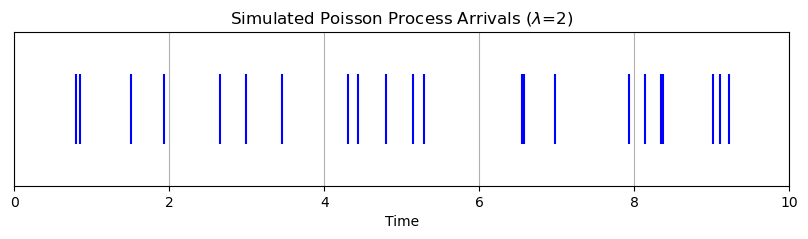

Number of events simulated in 10 time units: 22


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

# Parameters
lambda_rate = 2  # Average events per time unit (e.g., per hour)
total_time = 10 # Simulate over 10 time units
num_events_to_simulate = 30 # Approximate number (actual might differ)

# Inter-arrival times follow Exponential(lambda)
# We can simulate these times and sum them to get arrival times
inter_arrival_times = expon.rvs(scale=1/lambda_rate, size=num_events_to_simulate)

# Calculate arrival times by cumulative sum
arrival_times = np.cumsum(inter_arrival_times)

# Filter events that occur within the total_time
arrival_times = arrival_times[arrival_times <= total_time]

# Plot the arrival times
plt.figure(figsize=(10, 2))
plt.eventplot(arrival_times, orientation='horizontal', colors='blue')
plt.xlabel('Time')
plt.yticks([])
plt.title(f'Simulated Poisson Process Arrivals ($\lambda$={lambda_rate})')
plt.grid(True, axis='x')
plt.xlim(0, total_time)
plt.show()

print(f"Number of events simulated in {total_time} time units: {len(arrival_times)}")
# Compare to expected number: lambda * T = 2 * 10 = 20
# The actual number is random and follows Poisson(lambda*T)

### Brownian Motion

Brownian motion (or Wiener process) $W(t)$ models the random movement of particles suspended in a fluid, or more generally, phenomena exhibiting continuous random fluctuations.

Key properties (Standard Brownian Motion):
1.  $W(0) = 0$.
2.  Independent Increments: For any $0 \le s < t < u < v$, the increments $W(t) - W(s)$ and $W(v) - W(u)$ are independent random variables.
3.  Normal Increments: For any $0 \le s < t$, the increment $W(t) - W(s)$ is normally distributed with mean 0 and variance $t - s$. $W(t) \sim \mathcal{N}(0, t)$.
4.  Continuous Paths: The function $W(t)$ is continuous in $t$.

**Geometric Brownian Motion (GBM):** Often used in finance to model stock prices. A process $S(t)$ follows GBM if it satisfies the stochastic differential equation:
$$ dS(t) = \mu S(t) dt + \sigma S(t) dW(t) $$
where $\mu$ is the drift (average rate of return), $\sigma$ is the volatility (standard deviation of returns), and $dW(t)$ is the increment of a Wiener process.

The solution can be written as:
$$ S(t) = S(0) \exp\left( (\mu - \frac{\sigma^2}{2})t + \sigma W(t) \right) $$

**Example:** Simulating a simple stock price path using GBM.

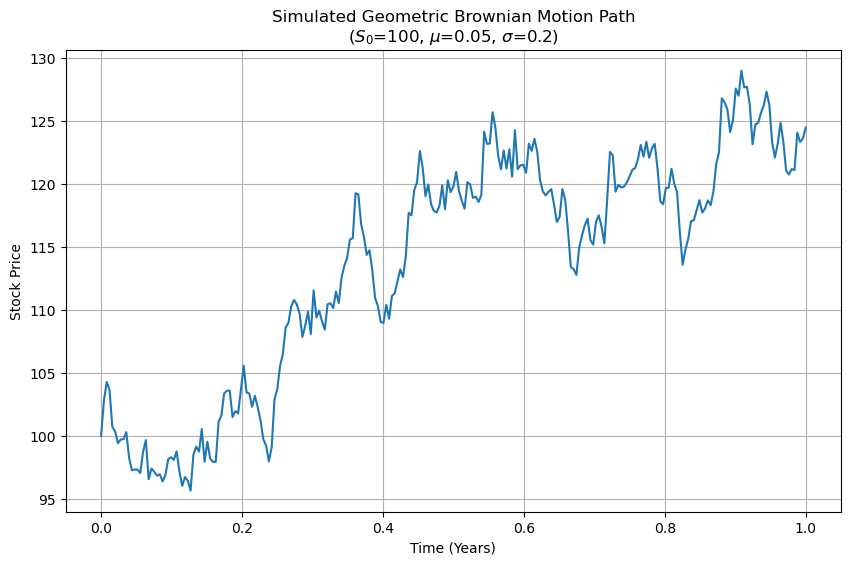

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Geometric Brownian Motion
S0 = 100     # Initial stock price
mu = 0.05    # Expected annual return (drift)
sigma = 0.2  # Annual volatility 
T = 1.0      # Time horizon in years
N = 252      # Number of time steps (e.g., trading days in a year)
dt = T / N   # Time step size

# Simulate the Wiener process increments (standard normal)
dW = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=N)

# Calculate the cumulative sum of increments to get W(t)
# Need W(t) at each step, so we need the cumulative sum
W = np.cumsum(dW)

# Add W(0)=0 at the beginning
W = np.insert(W, 0, 0.0)

# Time points
t = np.linspace(0.0, T, N + 1)

# Calculate the GBM path
S_t = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# Plot the simulated stock price path
plt.figure(figsize=(10, 6))
plt.plot(t, S_t)
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.title(f'Simulated Geometric Brownian Motion Path\n($S_0$={S0}, $\mu$={mu}, $\sigma$={sigma})')
plt.grid(True)
plt.show()

## Generating Functions

Generating functions are powerful tools in probability and combinatorics. They encode the sequence of probabilities of a distribution into a single function. Derivatives and manipulations of this function can reveal properties like moments (mean, variance) and the distribution of sums of independent random variables.

### Probability Generating Functions (PGFs)

Used for non-negative integer-valued discrete random variables $X$ (like Poisson, Binomial, Geometric). The PGF is defined as:

$$ G_X(z) = E[z^X] = \sum_{k=0}^{\infty} P(X=k) z^k $$

Properties:
* $G_X(1) = \sum P(X=k) = 1$
* $E[X] = G'_X(1)$ (first derivative evaluated at z=1)
* $Var(X) = G''_X(1) + G'_X(1) - [G'_X(1)]^2$
* If $X$ and $Y$ are independent, then $G_{X+Y}(z) = G_X(z) G_Y(z)$.

### Moment Generating Functions (MGFs)

Applicable to both discrete and continuous random variables. The MGF is defined as:

$$ M_X(t) = E[e^{tX}] $$

For discrete $X$: $M_X(t) = \sum_x e^{tx} P(X=x)$
For continuous $X$: $M_X(t) = \int_{-\infty}^{\infty} e^{tx} f_X(x) dx$

Properties:
* $M_X(0) = E[e^0] = 1$
* $E[X^n] = M_X^{(n)}(0)$ (n-th derivative evaluated at t=0)
* $E[X] = M'_X(0)$
* $Var(X) = E[X^2] - (E[X])^2 = M''_X(0) - [M'_X(0)]^2$
* If $X$ and $Y$ are independent, then $M_{X+Y}(t) = M_X(t) M_Y(t)$.
* Uniqueness: If two random variables have the same MGF (in a neighborhood around 0), they have the same distribution.

**Example:** The MGF of a Normal distribution $X \sim \mathcal{N}(\mu, \sigma^2)$ is $M_X(t) = \exp(\mu t + \frac{1}{2} \sigma^2 t^2)$.
Let's verify the mean and variance using derivatives:
* $M'_X(t) = (\mu + \sigma^2 t) \exp(\mu t + \frac{1}{2} \sigma^2 t^2)$
   $E[X] = M'_X(0) = (\mu + 0) \exp(0) = \mu$
* $M''_X(t) = \sigma^2 \exp(\dots) + (\mu + \sigma^2 t)^2 \exp(\dots)$
   $E[X^2] = M''_X(0) = \sigma^2 \exp(0) + (\mu + 0)^2 \exp(0) = \sigma^2 + \mu^2$
* $Var(X) = E[X^2] - (E[X])^2 = (\sigma^2 + \mu^2) - (\mu)^2 = \sigma^2$

While calculating MGFs often involves calculus, some libraries like `scipy.stats` internally use properties derived from them to provide moments.

In [5]:
from scipy.stats import norm

# Define a normal distribution object
mu = 5
sigma = 2
rv = norm(loc=mu, scale=sigma)

# SciPy provides methods to get moments directly
# These are consistent with what would be derived from the MGF
mean, var, skew, kurt = rv.stats(moments='mvsk')

print(f"Using scipy.stats for N(mu={mu}, sigma={sigma}):")
print(f"  Mean (E[X]): {mean:.4f} (Theoretical: {mu})" )
print(f"  Variance (Var(X)): {var:.4f} (Theoretical: {sigma**2})")

# Expected value of X^2 = Var(X) + (E[X])^2
ex2 = var + mean**2
print(f"  E[X^2]: {ex2:.4f} (Theoretical: {sigma**2 + mu**2})")

# Note: SciPy doesn't directly provide a symbolic MGF or its derivatives.
# Using MGFs is primarily an analytical technique.

Using scipy.stats for N(mu=5, sigma=2):
  Mean (E[X]): 5.0000 (Theoretical: 5)
  Variance (Var(X)): 4.0000 (Theoretical: 4)
  E[X^2]: 29.0000 (Theoretical: 29)


## Chapter Summary

This chapter offered a brief introduction to several advanced probability topics:
* **Information Theory:** We saw how entropy quantifies uncertainty (using `scipy.stats.entropy`) and KL divergence measures the difference between distributions.
* **Stochastic Processes:** We explored models for random evolution over time, simulating event arrivals with the **Poisson Process** (using `scipy.stats.expon` for inter-arrival times) and modeling continuous random movement like stock prices with **Geometric Brownian Motion** (using `numpy.random.normal` for increments).
* **Generating Functions:** We discussed the concepts of PGFs and MGFs as mathematical tools to analyze distributions and find moments, illustrating how `scipy.stats` provides moments consistent with MGF theory for common distributions like the Normal.

These areas represent vast fields of study. Hopefully, this glimpse has piqued your interest and demonstrated how the fundamental concepts learned throughout this book serve as stepping stones to more complex and powerful probabilistic modeling techniques.